(10, 5001)
(10, 5001)


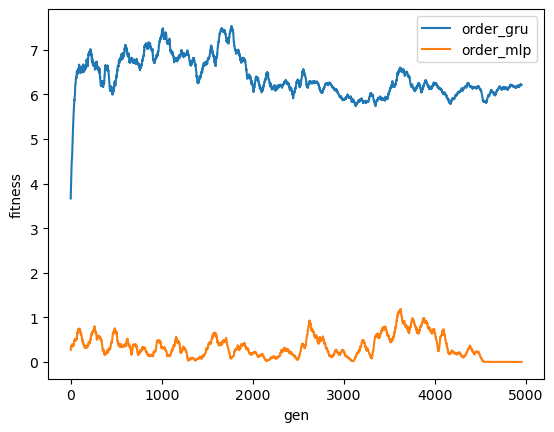

In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import numpy as np
import os

trials =10
stat_run_base_path = "/home/magraz/rovers/pyrover_domain/experiments/results/completed/"
experiment_type = "fitness_critic"
configurations = ["order_gru", "order_mlp"]
stat_run_paths = [os.path.join(stat_run_base_path, "_".join((experiment_type, config))) for config in configurations]


def moving_avg(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, "valid")

dd_list = []

for i in range(len(stat_run_paths)):

    for trial in range(0,trials):

        dd = defaultdict(list)

        with open(
            os.path.join(stat_run_paths[i], "_".join(("trial", str(trial), configurations[i])), "fitness.csv"), "r"
        ) as csvfile:
            for line in csv.DictReader(csvfile):
                for key, value in line.items():
                    if key != "" and value != "" and value != None and not isinstance(value, list):
                        dd[key].append(float(value))

        dd_list.append(dd)

avg_vals = []
std_vals = []

for i in range(len(configurations)):

    config_vals = []

    for dd in dd_list[i * trials : (i + 1) * trials]:
        config_vals.append(np.array(dd["team_fitness_aggregated"]))

    config_vals = np.array(config_vals)

    avg_vals.append(np.mean(config_vals, axis=0))
    std_vals.append(np.std(config_vals, axis=0))

    print(config_vals.shape)

fig = plt.figure()
ax = fig.add_subplot(111)

for avg,std in zip(avg_vals,std_vals):

    window_size = 50

    window_avg = np.lib.stride_tricks.sliding_window_view(avg, window_size)
    window_std = np.lib.stride_tricks.sliding_window_view(std, window_size)

    moving_avg = np.mean(window_avg, axis=-1)
    moving_std = np.mean(window_std, axis=-1)

    std_plus = moving_avg + moving_std/np.sqrt(trials)
    std_minus = moving_avg - moving_std/np.sqrt(trials)

    ax.plot(moving_avg)
    # ax.fill_between(np.linspace(0, moving_avg.shape[0], moving_avg.shape[0]), std_plus, std_minus, alpha=0.2)

ax.set_xlabel("gen")
ax.set_ylabel("fitness")

plt.legend(configurations) 

plt.show()
